In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
df = pd.read_csv("C:/fili/jupyter_proyectos/beisbol.csv")


# Ver primeras filas
df.head()


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [7]:
# Eliminar columna que no aporta información
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Info general
df.info()

# Estadísticos descriptivos
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   equipos  30 non-null     object
 1   bateos   30 non-null     int64 
 2   runs     30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


In [10]:
# Variable objetivo: runs
y = df["runs"]

# Característica(s) explicativa(s): bateos
X = df[["bateos"]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% para prueba
    random_state=42
)


In [12]:
# Definir el modelo base
ridge = Ridge()

# Grid de hiperparámetros
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

# GridSearch con validación cruzada de 5 folds
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring="r2"
)

# Entrenar
grid_search.fit(X_train, y_train)

print("Mejor alpha:", grid_search.best_params_)
print("Mejor score CV (R2):", grid_search.best_score_)


Mejor alpha: {'alpha': 100}
Mejor score CV (R2): 0.20802207276905746


In [13]:
best_ridge = grid_search.best_estimator_

# Predicciones
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

# Función auxiliar para imprimir métricas
def regression_metrics(y_true, y_pred, nombre=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {nombre} ---")
    print("MAE :", mae)
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("R2  :", r2)

regression_metrics(y_train, y_train_pred, "Entrenamiento")
regression_metrics(y_test, y_test_pred, "Prueba")


--- Entrenamiento ---
MAE : 53.58433370520419
MSE : 3944.9823360556184
RMSE: 62.80909437378968
R2  : 0.44280511687039525
--- Prueba ---
MAE : 51.61050826692698
MSE : 5219.057773726091
RMSE: 72.24304654239113
R2  : -0.5172169631943799


C:\Users\Trist\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


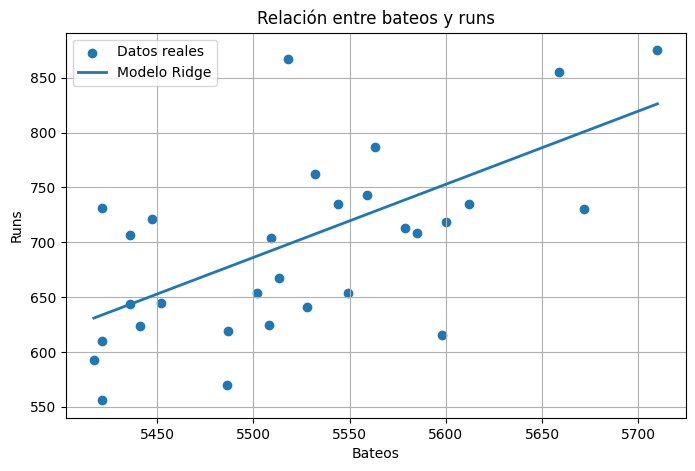

In [14]:
plt.figure(figsize=(8,5))

# Dispersión de datos reales
plt.scatter(X, y, label="Datos reales")

# Línea de regresión (usando todo X ordenado)
X_plot = np.linspace(X["bateos"].min(), X["bateos"].max(), 100).reshape(-1, 1)
y_plot = best_ridge.predict(X_plot)

plt.plot(X_plot, y_plot, label="Modelo Ridge", linewidth=2)

plt.xlabel("Bateos")
plt.ylabel("Runs")
plt.title("Relación entre bateos y runs")
plt.legend()
plt.grid(True)
plt.show()


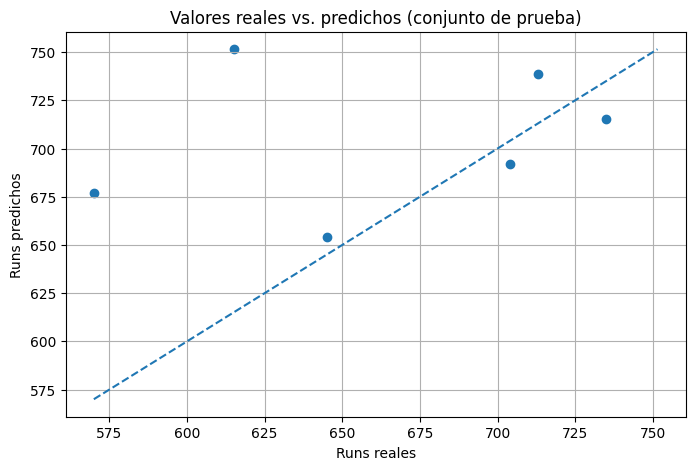

In [15]:
plt.figure(figsize=(8,5))

plt.scatter(y_test, y_test_pred)
plt.xlabel("Runs reales")
plt.ylabel("Runs predichos")
plt.title("Valores reales vs. predichos (conjunto de prueba)")
plt.grid(True)

# Línea de referencia y = x
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")

plt.show()
